# Markov Chain Monte Carlo (MCMC) to predict the weather

The MCMC algorithm is a method to generate sample that follow the posterior distribution. 

We can start from the basis remembering that a Markov Chain is a chain in which each element depend only by the previous one:
$$
p(\theta_{i+1}|\theta_i, \theta_{i-1}, \theta_{i-2}, ...) = p(\theta_{i+1}|\theta_i)
$$

with
$$
p(\theta_{i+1}|\theta_i) = p(\theta_i| \theta_{i + 1})
$$

and the Monte Carlo method is a way to integrate a complex function by sampling random numbers: 
$$
\int \, dx\, f(x)p(x) \approx \frac{1}{N}\sum_{i=1}^Nf(x_i)\hspace{1cm}\int\, dx\, p(x) = 1
$$

The idea at the basis of MCMC is to generate sample that are correlated with the last element generated, in this way is possible to create more elements in the high interest regions of the function.
In order to reach the **stationary distribution** of the Markov Chain we can compute:
$$ 
p(\theta_{i+1}) = \int \,d \theta_i\,  T(\theta_{i+1}|\theta_i)p(\theta_i)
$$
where the transition probability $T(\theta_{i+1}|\theta_i)$ is called the **proposal distribution**, it proposes new positions to jump to in parameter space.

The MCMC algorithm is stopped when the **detailed balance** condition is satisfied:
$$ 
T(\theta_{i+1}|\theta_i)p(\theta_i) = T(\theta_i|\theta_{i+1})p(\theta_{i+1}). 
$$
this condition ensures that the chain will converge to the **stationary distribution**.



## The Metropolis-Hastings Algorithm

The Metropolis-Hastings Algorithm is a MCMC algorithm that use the following proposal distribution: 
$$
T(\theta_{i+1}|\theta_i) = p_{acc}(\theta_i, \theta_{i+1})K(\theta_{i+1}|\theta_i)
$$
where $K(\theta_{i+1}|\theta_i)$ is an arbitrary function.

The idea is to generate a point and randomly accept it using the **acceptance probability** that doesn't depend on $K(\theta_{i+1}|\theta_i)$.
$$
p_{acc}(\theta_i, \theta_{i+1}) = \frac{p(\theta_{i+1})}{p(\theta_i)}
$$

In [1]:
# Acceptance probabilities
p_clear_cloudy = 0.5
p_cloudy_cloudy = 0.5
p_clear_clear = 0.9
p_cloudy_clear = 0.1

In [ ]:
import numpy as np

days = []
N = 100000
weather = 'cloudy'

days.append(weather)

# Markov Chain 
for _ in range(N):
    r = np.random.uniform(0, 1)

    if weather == 'cloudy':
        if r < p_cloudy_cloudy:
            weather = 'cloudy'
        else:
            weather = 'clear'
    else:
        if r < p_clear_clear:
            weather = 'clear'
        else:
            weather = 'cloudy'

    days.append(weather)

p_cloudy = days.count('cloudy') / len(days)
p_clear = days.count('clear') / len(days)

print(f'P(cloudy) = {p_cloudy}')
print(f'P(clear) = {p_clear}')

P(cloudy) = 0.16974830251697484
P(clear) = 0.8302516974830252


## Trace-plot

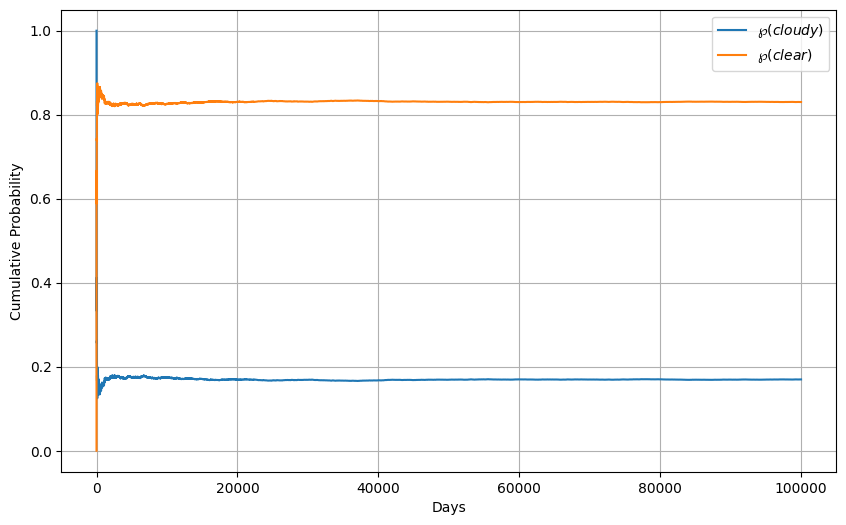

In [3]:
import matplotlib.pyplot as plt

cum_clear = np.cumsum([1 if day == 'clear' else 0 for day in days]) / np.arange(1, len(days) + 1)
cum_cloudy = np.cumsum([1 if day == 'cloudy' else 0 for day in days]) / np.arange(1, len(days) + 1)

d = np.arange(len(days))

plt.figure(figsize=(10, 6))
plt.plot(d, cum_cloudy, label=r'$\wp(cloudy)$')
plt.plot(d, cum_clear, label=r'$\wp(clear)$')
plt.xlabel('Days')
plt.ylabel('Cumulative Probability')
# plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

We can see how in the first steps the algorithm fluctuate a lot. 

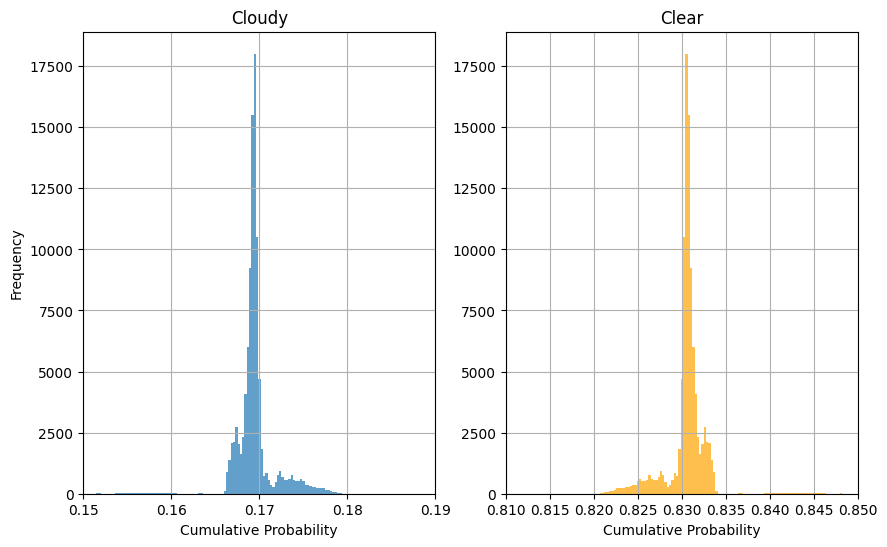

In [9]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(cum_cloudy, bins=int(N/30), alpha=0.7, label=r'$\wp(cloudy)$')
plt.xlabel('Cumulative Probability')
plt.ylabel('Frequency')
plt.title('Cloudy')
plt.xlim(0.15, 0.19)
plt.grid()
plt.subplot(1, 2, 2)
plt.hist(cum_clear, bins=int(N/30), alpha=0.7, label=r'$\wp(clear)$', color='orange')
plt.xlabel('Cumulative Probability')
plt.title('Clear')
plt.xlim(0.81, 0.85)
plt.grid()
plt.show()

The distributions are not simmetric and so the best statistics to study ar ethe median and the $\sigma_G$.

## Burn in

In the first steps the algorithm fluctuate a lot and so to use only the points generated with the stationary distribution we can select only the points after a given threshold. This is called **burn in**.

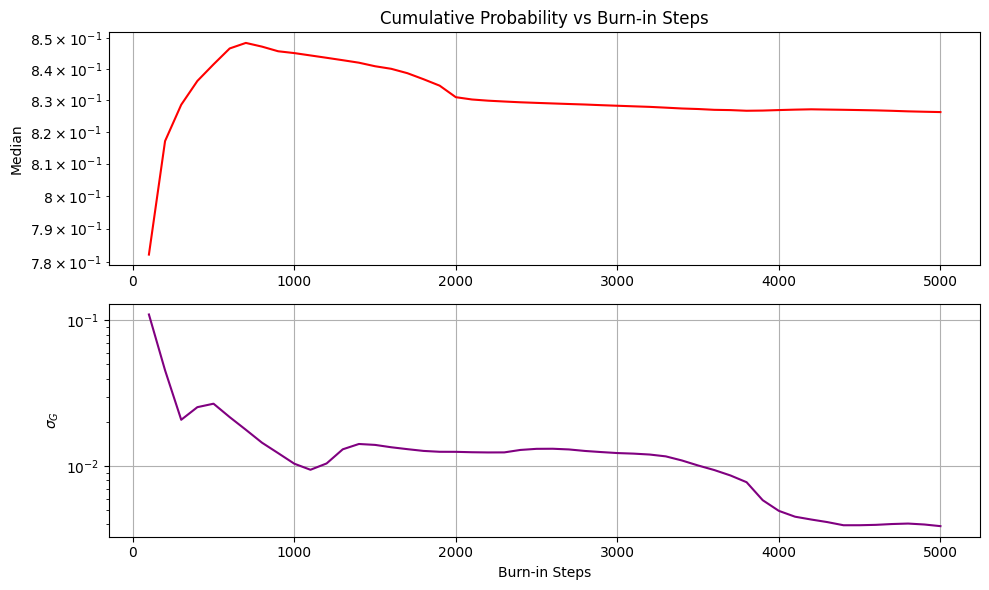

In [6]:
from astroML.stats import sigmaG

burning_indices = [(i + 1) * 100 for i in range(50)]

medians = [np.median(cum_clear[:i]) for i in burning_indices]
sigmaGs = [sigmaG(cum_clear[:i]) for i in burning_indices]

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(burning_indices, medians, label='Median', color='red')
plt.ylabel('Median')
plt.title('Cumulative Probability vs Burn-in Steps')
plt.yscale('log')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(burning_indices, sigmaGs, label='sigmaG', color='purple')
plt.xlabel('Burn-in Steps')
plt.ylabel(r'$\sigma_G$')
plt.yscale('log')
plt.grid()
plt.tight_layout()
plt.show()

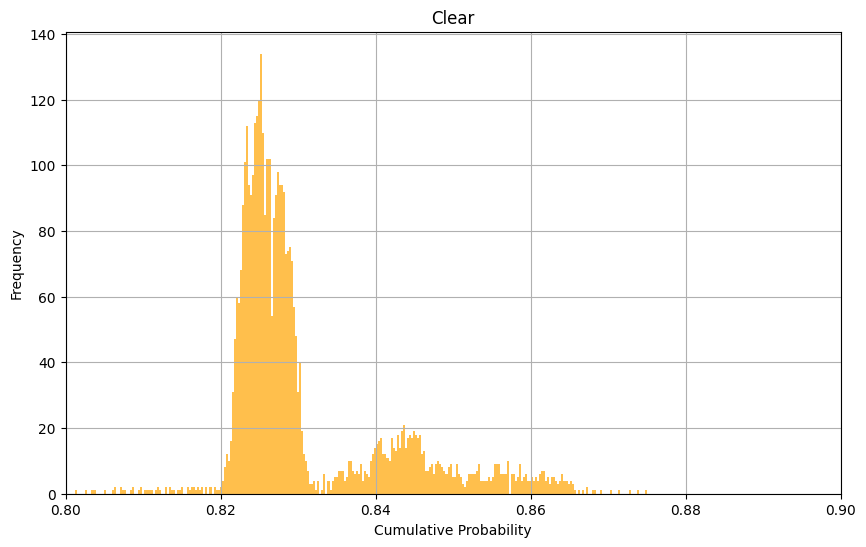

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(cum_clear[:4000], bins=int(N/30), alpha=0.7, label=r'$\wp(clear)$', color='orange')
plt.xlabel('Cumulative Probability')
plt.ylabel('Frequency')
plt.title('Clear')
plt.xlim(0.8, 0.9)
plt.grid()

Taking a look at this plot we can see how probably a burn in of 4000 steps is too low.